## 各位同学好，这次作业我们来实践利用python的数据可视化

今天咱们要用到的数据还是NYSE的数据，没有数据的同学可以找班主任要哈，他那边有百度网盘~

这里展示的图片大家需要满足以下要求，每一个组图片按照以下要求给分：
1. 内容正确40%
2. 图标题、坐标轴标题清晰明了20%
3. 颜色选取清晰20% 
    > 注：对于有着不同意义的数据点要用**不同类型的点**做图例标注，避免歧义 `ax.set_prop_circle`, `sns.hls_palette`
4. 图片中信息分布合理20% 
    > 注：对于过分集中的数据采用对数坐标 `plt.gca().set_xscale`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fun_df = pd.read_csv('nyse/fundamentals.csv')
sec_df = pd.read_csv('nyse/securities.csv')
fun_df.columns
fun_df.columns = fun_df.columns.str.lower() # 将所有列名小写化
sec_df.columns = sec_df.columns.str.lower() # 将所有列名小写化
new_df = pd.merge(fun_df, sec_df, on = 'ticker symbol', how = 'inner') # 按股票代码（ticker symbol）进行合并

## 图1：用饼图表示NYSE数据中2015年净利润（Net Income）最多的100家公司的行业（GICS Sector）组成（30 分）

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


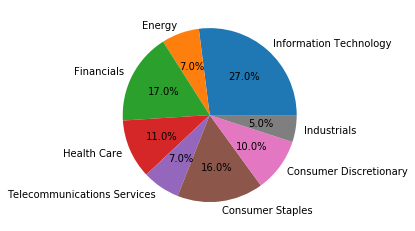

In [3]:
from collections import Counter

_industry100 = new_df.sort_index(by = ['net income'], ascending = False)[:100] # 按'Net Income'排序并取出前100

gs_counter = Counter(_industry100['gics sector']) # 筛选出'gics sector'及对应数量
gs_df = pd.DataFrame.from_dict(gs_counter, orient='index', columns = ['number']) # 字典转换成DataFrame
plt.pie(x = gs_df['number'], labels = gs_df.index, autopct = '%1.1f%%') # 绘制饼图
plt.show()

In [4]:
tr_dist = new_df.groupby('gics sector') # 根据不同行业（GICS Sector）进行分组

## 图2：在一张直方图中表示不同行业（GICS Sector）的营收（total revenue）分布（30 分）

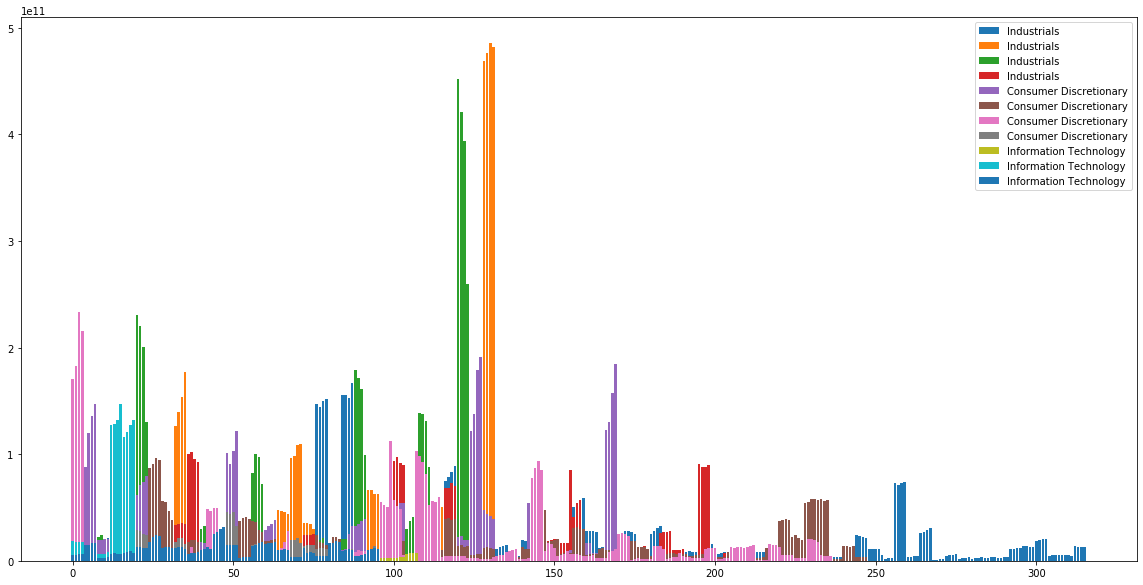

In [5]:
import numpy as np

plt.figure(figsize = (20, 10))
for key, value in tr_dist: # 根据不同行业（GICS Sector）进行迭代
    plt.bar(np.arange(len(value['total revenue'])), value['total revenue']) # 绘制堆叠直方图
plt.legend(new_df['gics sector'])
plt.show()

## 图3：在一张二维散点图中表示不同行业的固定资产（Fixed Assets）/总资产（Total Assets）与盈利（Net Income）和营收(Total Revenue)的比例 （40 分）

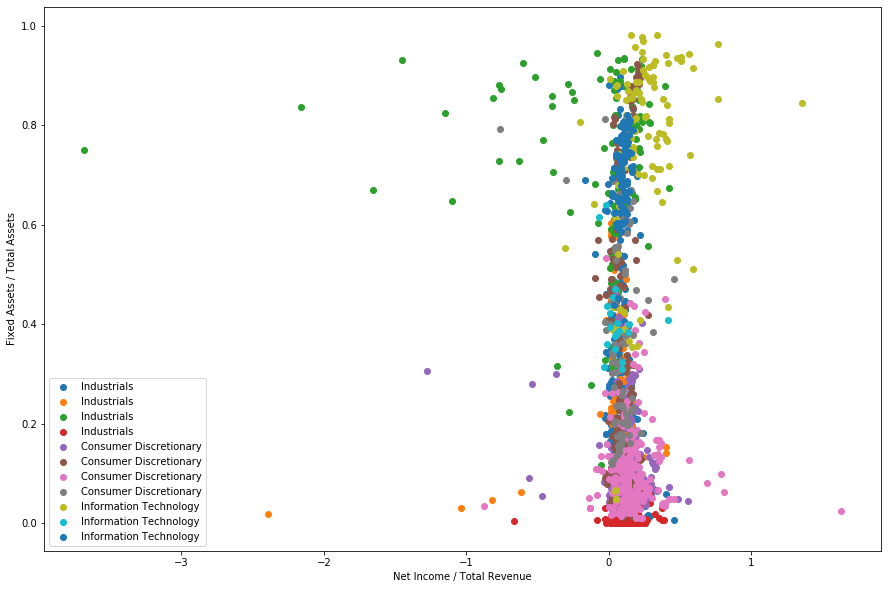

In [6]:
new_df['fixed/total'] = new_df['fixed assets'] / new_df['total assets'] # 新增一列'fixed/total'：固定资产（Fixed Assets）/总资产（Total Assets）
new_df['nt/tr'] = new_df['net income'] / new_df['total revenue'] # 新增一列'nt/tr'：盈利（Net Income）/营收(Total Revenue)
plt.figure(figsize = (15, 10))
for key, value in tr_dist: # 根据不同行业（GICS Sector）进行迭代
    plt.scatter(value['nt/tr'], value['fixed/total']) # 绘制散点图
plt.ylabel('Fixed Assets / Total Assets')
plt.xlabel('Net Income / Total Revenue')
plt.legend(new_df['gics sector'])
plt.show()